In [175]:
import numpy as np
import pandas as pd

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
frame = pd.read_csv(r'20152018/ausleihen_merged_ohne_nullen.csv')
#frame = pd.read_csv(r'ausleihen_mit_wetter.csv')
df = pd.DataFrame(frame)
df.head()

,year,month,day,hour,count,holidays,weekday,workday,tempC,precipMM,humidity,windspeedKmph,weatherDesc2
0,2015,1,1,2,1,1,3,0,-4,0.0,50,21,Clear
1,2015,1,1,10,3,1,3,0,-1,0.0,37,25,Sunny
2,2015,1,1,11,3,1,3,0,0,0.0,36,24,Sunny
3,2015,1,1,12,2,1,3,0,2,0.0,35,22,Sunny
4,2015,1,1,13,5,1,3,0,2,0.0,37,23,Sunny


In [193]:
df = df.drop(['windspeedKmph'],axis=1)

In [162]:
df = pd.get_dummies(df, columns=['weatherDesc2'] )

In [58]:
df = df[df.dayofweek != 5]

In [163]:
df.head()

,year,month,day,hour,count,holidays,weekday,workday,tempC,precipMM,...,weatherDesc2_Patchy light rain,weatherDesc2_Patchy light rain with thunder,weatherDesc2_Patchy light snow,weatherDesc2_Patchy moderate snow,weatherDesc2_Patchy rain possible,weatherDesc2_Patchy sleet possible,weatherDesc2_Patchy snow possible,weatherDesc2_Sunny,weatherDesc2_Thundery outbreaks possible,weatherDesc2_Torrential rain shower
0,2015,1,1,2,1,1,3,0,-4,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015,1,1,10,3,1,3,0,-1,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2015,1,1,11,3,1,3,0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,2015,1,1,12,2,1,3,0,2,0.0,...,0,0,0,0,0,0,0,1,0,0
4,2015,1,1,13,5,1,3,0,2,0.0,...,0,0,0,0,0,0,0,1,0,0


In [194]:
#Split Data
y = df['count']
X = df.drop('count',axis=1)

# Train-Test-Split
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=False, random_state=1)

In [95]:
X_train

,year,month,day,hour,dayofweek,tempC,precipMM,humidity
8760,2018,1,1,0,0,-12.0,0.0,65.0
8761,2018,1,1,1,0,-12.0,0.0,64.0
8762,2018,1,1,2,0,-12.0,0.0,64.0
8763,2018,1,1,3,0,-12.0,0.0,64.0
8764,2018,1,1,4,0,-12.0,0.0,64.0
...,...,...,...,...,...,...,...,...
15743,2018,10,18,23,3,11.0,0.0,44.0
15744,2018,10,19,0,4,11.0,0.0,46.0
15745,2018,10,19,1,4,10.0,0.0,48.0
15746,2018,10,19,2,4,10.0,0.0,50.0


In [195]:
#Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [180]:
X_test

,year,month,hour,holidays,weekday,workday,tempC,precipMM,humidity,windspeedKmph,...,weatherDesc2_Patchy light rain,weatherDesc2_Patchy light rain with thunder,weatherDesc2_Patchy light snow,weatherDesc2_Patchy moderate snow,weatherDesc2_Patchy rain possible,weatherDesc2_Patchy sleet possible,weatherDesc2_Patchy snow possible,weatherDesc2_Sunny,weatherDesc2_Thundery outbreaks possible,weatherDesc2_Torrential rain shower
21274,1.96695,-0.709554,-1.236034,-0.168597,-0.993870,0.647101,-1.001742,-0.291878,0.461935,-0.763754,...,-0.057457,-0.016796,-0.072094,-0.038201,-0.252494,-0.016796,-0.06518,-0.6086,-0.024727,-0.088141
21275,1.96695,-0.709554,-1.066518,-0.168597,-0.993870,0.647101,-1.001742,-0.291878,0.527245,-0.481679,...,-0.057457,-0.016796,-0.072094,-0.038201,-0.252494,-0.016796,-0.06518,-0.6086,-0.024727,-0.088141
21276,1.96695,-0.709554,-0.897003,-0.168597,-0.993870,0.647101,-1.001742,-0.138861,0.592555,-0.199603,...,-0.057457,-0.016796,-0.072094,-0.038201,-0.252494,-0.016796,-0.06518,-0.6086,-0.024727,-0.088141
21277,1.96695,-0.709554,-0.727488,-0.168597,-0.993870,0.647101,-0.897949,-0.138861,0.657866,0.223510,...,-0.057457,-0.016796,-0.072094,-0.038201,-0.252494,-0.016796,-0.06518,-0.6086,-0.024727,-0.088141
21278,1.96695,-0.709554,-0.557973,-0.168597,-0.993870,0.647101,-1.001742,-0.291878,0.853797,-0.058566,...,-0.057457,-0.016796,-0.072094,-0.038201,-0.252494,-0.016796,-0.06518,-0.6086,-0.024727,-0.088141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26588,1.96695,1.644772,-0.049427,-0.168597,-1.499576,0.647101,-0.690361,-0.291878,0.266003,0.364547,...,-0.057457,-0.016796,-0.072094,-0.038201,-0.252494,-0.016796,-0.06518,-0.6086,-0.024727,-0.088141
26589,1.96695,1.644772,0.120089,-0.168597,-1.499576,0.647101,-0.794155,1.391304,0.592555,0.505585,...,-0.057457,-0.016796,-0.072094,-0.038201,-0.252494,-0.016796,-0.06518,-0.6086,-0.024727,-0.088141
26590,1.96695,1.644772,0.289604,-0.168597,-1.499576,0.647101,-0.794155,1.850353,0.919108,0.787660,...,-0.057457,-0.016796,-0.072094,-0.038201,-0.252494,-0.016796,-0.06518,-0.6086,-0.024727,-0.088141
26591,1.96695,1.644772,0.459119,-0.168597,-1.499576,0.647101,-0.794155,0.779238,1.049729,0.928698,...,-0.057457,-0.016796,-0.072094,-0.038201,-0.252494,-0.016796,-0.06518,-0.6086,-0.024727,-0.088141


In [196]:
# Training
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [197]:
y_pred = model.predict(X_test)

In [198]:
#Get RSME
_, _ = get_rmse(model, 'XGBRegressor')

XGBRegressor 	 - RMSE on Training  = 5.25 / RMSE on Test = 8.76


In [169]:
np.sqrt(np.mean((y_test - y_pred)**2))

8.48457027443537

In [184]:
y_train.describe()

count    21274.000000
mean        13.774278
std         14.703587
min          1.000000
25%          3.000000
50%          9.000000
75%         19.000000
max        121.000000
Name: count, dtype: float64

In [171]:
1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))

0.7478198246577386

In [199]:
# Plot
fig = px.scatter(
    x=y_pred,
    y=y_test,
    labels={'x':"Predicted", 'y':'Actual'},
    width=700,
    height=700
)

fig.show()

In [89]:
pred_y = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y[0:20]

,Actual Value,Predicted Value,Difference
7008,8,7.539054,0.460946
7009,2,4.013738,-2.013738
7010,1,3.371460,-2.371460
7011,0,2.659487,-2.659487
7012,1,2.897989,-1.897989
7013,20,7.019986,12.980014
7014,150,127.789986,22.210014
7015,86,79.939560,6.060440
7016,23,45.207256,-22.207256
7017,30,28.589830,1.410170


In [217]:
print(df.loc[11297:11316])

       year  month  dayofweek  hour  anzahl  day1anzahl  weekday  tempC  \
11297  2018      8          3    21      13         7.0        1   28.0   
11298  2018      8          3    22       6         9.0        1   28.0   
11299  2018      8          3    23       5         4.0        1   28.0   
11300  2018      8          4     0       4         5.0        1   27.0   
11301  2018      8          4     2       2         0.0        1   27.0   
11302  2018      8          4     3       1         1.0        1   27.0   
11303  2018      8          4     4       2         2.0        1   27.0   
11304  2018      8          4     5       1         6.0        1   27.0   
11305  2018      8          4     6      98       108.0        1   27.0   
11306  2018      8          4     7      39        69.0        1   28.0   
11307  2018      8          4     8      18        30.0        1   28.0   
11308  2018      8          4     9      21        21.0        1   29.0   
11309  2018      8       

In [31]:
df

,year,month,dayofweek,hour,anzahl,day1anzahl,weekday,tempC,precipMM,humidity
0,2017,1,6,0,2,0.0,0,4.0,0.6,75.0
1,2017,1,6,1,2,0.0,0,4.0,0.3,76.0
2,2017,1,6,4,1,0.0,0,3.0,0.0,81.0
3,2017,1,6,5,1,0.0,0,3.0,0.0,82.0
4,2017,1,6,11,2,0.0,0,6.0,0.0,67.0
...,...,...,...,...,...,...,...,...,...,...
14146,2018,12,0,15,3,5.0,1,0.0,0.0,0.0
14147,2018,12,0,16,4,3.0,1,0.0,0.0,0.0
14148,2018,12,0,20,2,1.0,1,0.0,0.0,0.0
14149,2018,12,0,21,2,1.0,1,0.0,0.0,0.0


In [ ]:
#Plotting

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

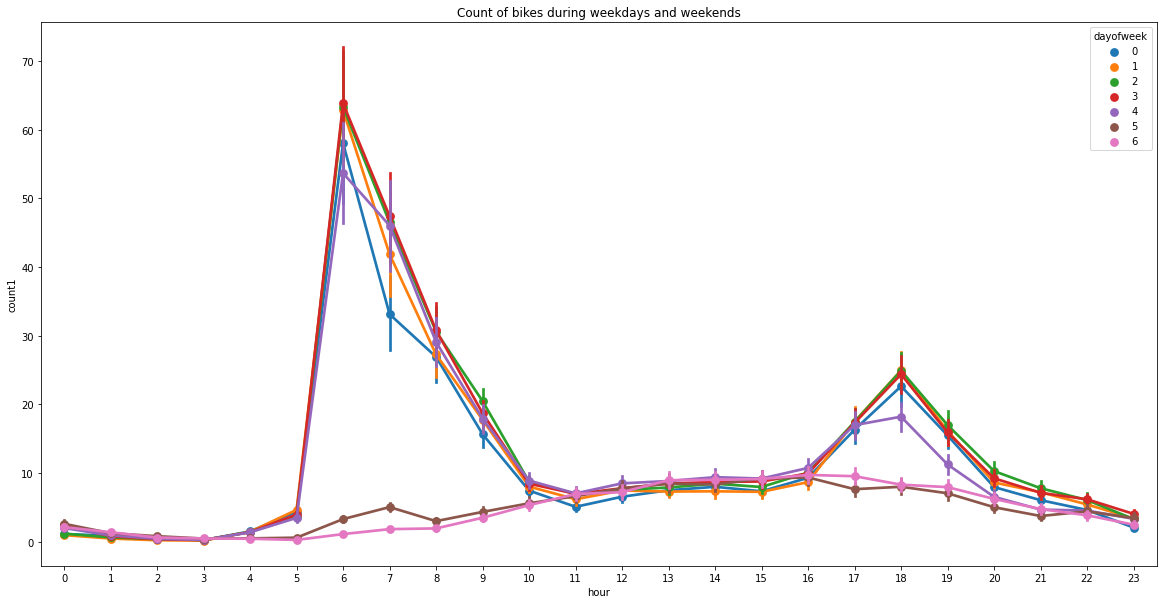

In [239]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count1', hue='dayofweek', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

<AxesSubplot:>

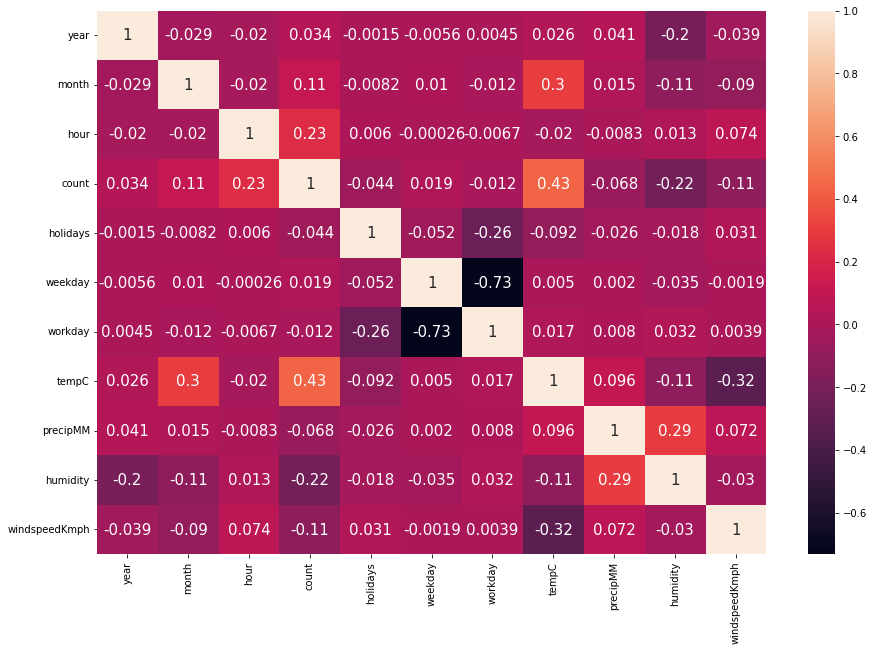

In [191]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

In [196]:
X_train_normalized[0]

array([0.        , 0.36      , 0.69879518, 0.04347826, 1.        ,
       6.        , 0.        , 0.        ])

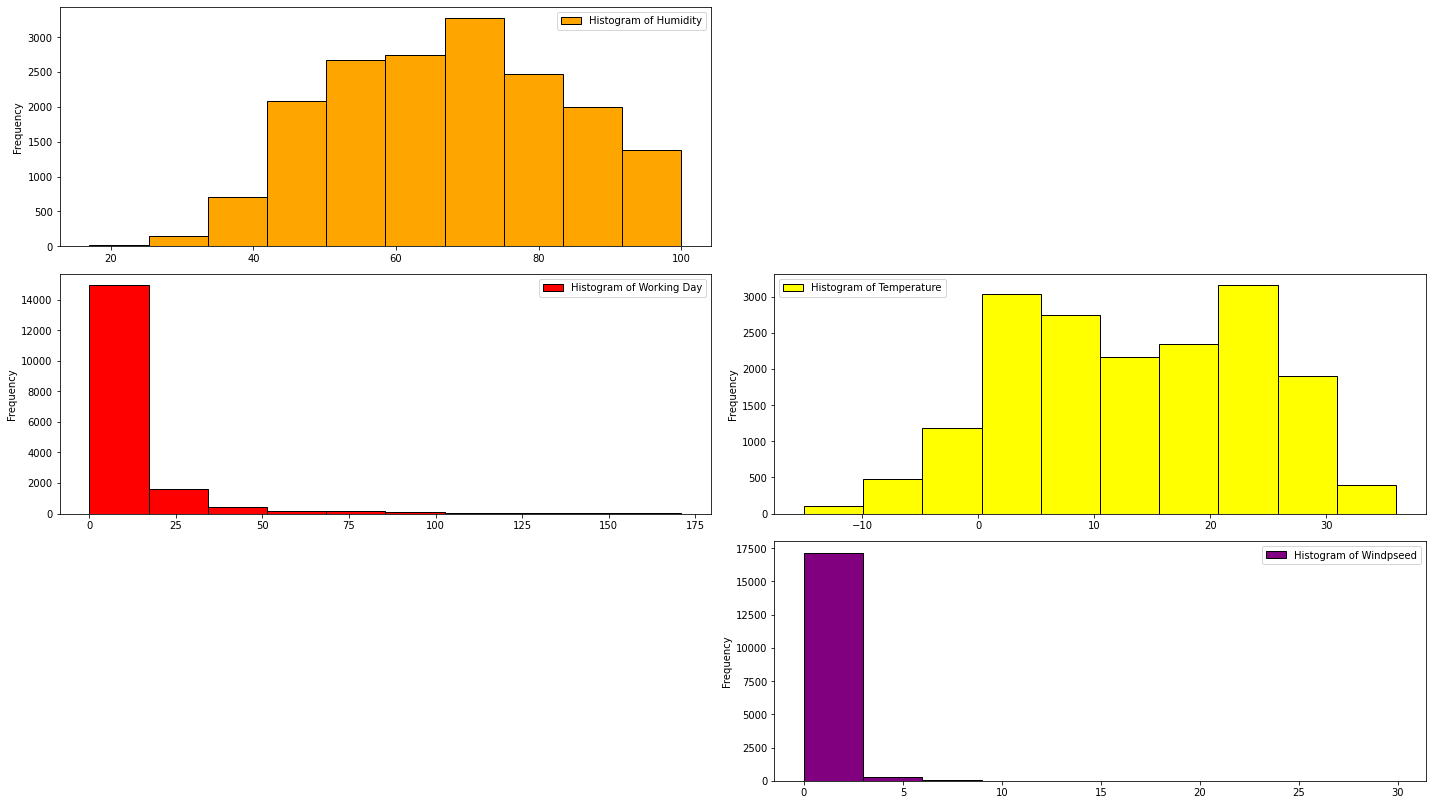

In [56]:
plt.figure(figsize=(20,15))
plt.subplot(423)
df['humidity'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(425)
df['count1'].plot.hist(bins=10, color='red', label='Histogram of Working Day', edgecolor='black')
plt.legend(loc='best')
plt.subplot(426)
df['tempC'].plot.hist(bins=10, color='yellow', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(428)
df['precipMM'].plot.hist(bins=10, color='purple', label='Histogram of Windpseed', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

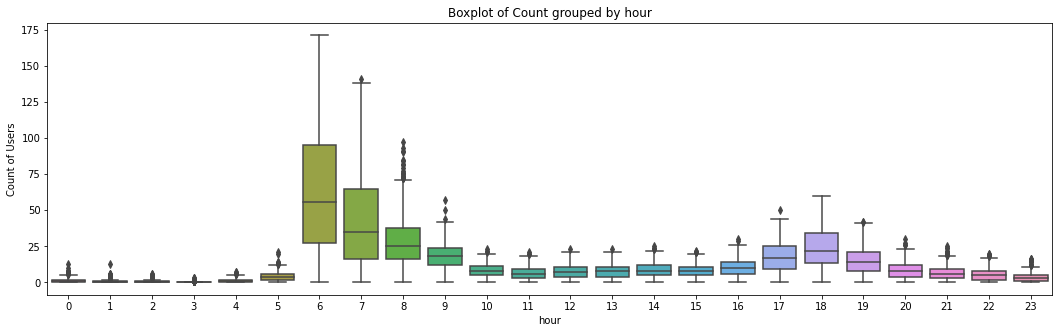

In [59]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=df['hour'], y=df['count1'], ax=ax)
ax.set_ylabel('Count of Users')
ax.set_title("Boxplot of Count grouped by hour");

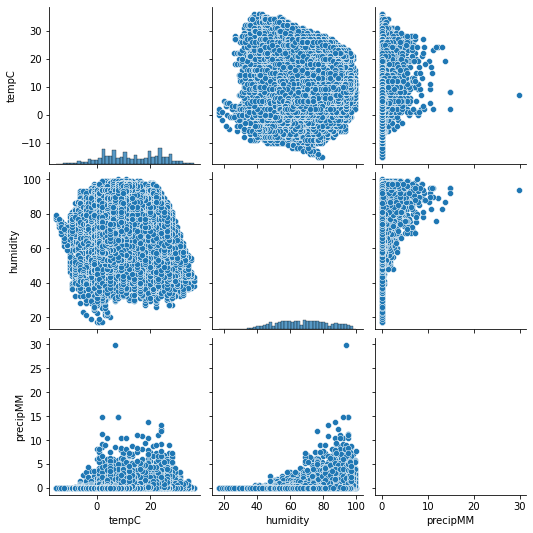

In [62]:
sns.pairplot(df[['tempC', 'humidity', 'precipMM']])

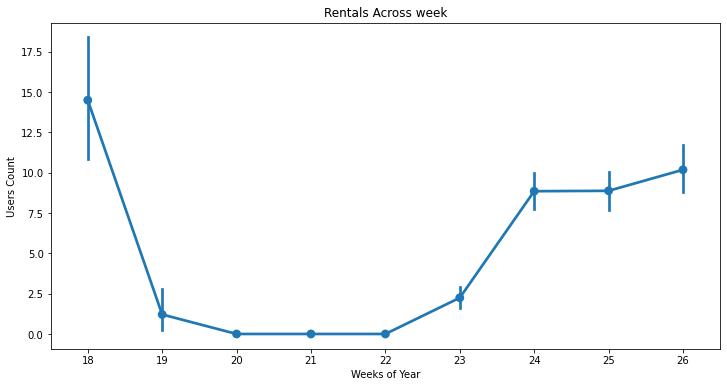

In [132]:
plt.figure(figsize=(12, 6))
sns.pointplot(x=df["week"], y=df["count1"])#, hue=df["year"]
plt.xlabel("Weeks of Year")
plt.ylabel("Users Count") 
plt.title("Rentals Across week")
plt.show()

In [130]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

/tmp/ipykernel_811/2370506791.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
df['week'] = df['date'].dt.isocalendar().week

/tmp/ipykernel_811/2825791865.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
df = df[df['year']==2018]

In [126]:
df = df[(df['month']==5) | (df['month']==6)]

In [127]:
df

,year,month,day,hour,dayofweek,date,count1,tempC,precipMM,humidity
11640,2018,5,1,0,1,2018-05-01,0,9.0,0.1,70.0
11641,2018,5,1,1,1,2018-05-01,0,9.0,0.0,70.0
11642,2018,5,1,2,1,2018-05-01,0,9.0,0.0,69.0
11643,2018,5,1,3,1,2018-05-01,0,9.0,0.0,68.0
11644,2018,5,1,4,1,2018-05-01,3,9.0,0.0,64.0
...,...,...,...,...,...,...,...,...,...,...
13099,2018,6,30,19,5,2018-06-30,10,33.0,0.0,50.0
13100,2018,6,30,20,5,2018-06-30,5,32.0,0.0,53.0
13101,2018,6,30,21,5,2018-06-30,6,30.0,0.0,56.0
13102,2018,6,30,22,5,2018-06-30,17,30.0,0.0,58.0


In [ ]:
#Trees

In [173]:
def get_rmse(reg, model_name):
    """Print the score for the model passed in argument and retrun scores for the train/test sets"""
    
    y_train_pred, y_pred = reg.predict(X_train), reg.predict(X_test)
    rmse_train, rmse_test = np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_pred))
    print(model_name, f'\t - RMSE on Training  = {rmse_train:.2f} / RMSE on Test = {rmse_test:.2f}')
    
    return rmse_train, rmse_test


In [200]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)
_, _ = get_rmse(rf, 'rondom forrest')

rondom forrest 	 - RMSE on Training  = 2.51 / RMSE on Test = 8.84


In [201]:
gb = GradientBoostingRegressor(n_estimators=100).fit(X_train, y_train)
_, _ = get_rmse(gb, 'gb')

gb 	 - RMSE on Training  = 7.78 / RMSE on Test = 9.55
